In [37]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
DB_PATH = "D:\\Elevate Data Analyst\\TASK 7\\sales_data.db"
TABLE = "sales"

In [15]:
def create_db(conn):
    conn.execute(f"""
        CREATE TABLE IF NOT EXISTS {TABLE} (
            order_id TEXT,
            product TEXT,
            quantity INTEGER,
            price REAL,
            order_date TEXT,   -- ISO string (YYYY-MM-DD HH:MM:SS)
            country TEXT
        );
    """)
    conn.commit()

In [16]:
def insert_sample_data(conn):
    sample = [
        ("INV-001", "Paper Clips", 10, 1.99, "2023-01-15 10:05:00", "United Kingdom"),
        ("INV-002", "Binder", 5, 3.49, "2023-01-20 14:20:00", "United Kingdom"),
        ("INV-003", "Stapler", 2, 7.99, "2023-02-05 09:10:00", "France"),
        ("INV-004", "Notebook", 12, 2.49, "2023-02-07 16:45:00", "Germany"),
        ("INV-005", "Pencil", 20, 0.99, "2023-02-18 11:30:00", "Spain"),
        ("INV-006", "Marker", 6, 1.49, "2023-03-01 13:00:00", "United Kingdom"),
    ]
    conn.executemany(f"INSERT INTO {TABLE} (order_id, product, quantity, price, order_date, country) VALUES (?,?,?,?,?,?)", sample)
    conn.commit()
    print(f"Inserted {len(sample)} sample rows into '{TABLE}'.")

In [27]:
def main():
    # Create DB
    conn = sqlite3.connect(DB_PATH)
    create_db(conn)

    insert_sample_data(conn)

    # Quick sanity check
    cur = conn.cursor()
    cur.execute(f"SELECT COUNT(*) FROM {TABLE};")
    total = cur.fetchone()[0]
    print(f"Total rows now in '{TABLE}': {total:,}")
    print("Done. Created 'sales_data.db'.")

if __name__ == "__main__":
    main()

Inserted 6 sample rows into 'sales'.
Total rows now in 'sales': 30
Done. Created 'sales_data.db'.


In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute("select * from sales")
rows = cursor.fetchall()  

for row in rows:
    print(row)


('INV-001', 'Paper Clips', 10, 1.99, '2023-01-15 10:05:00', 'United Kingdom')
('INV-002', 'Binder', 5, 3.49, '2023-01-20 14:20:00', 'United Kingdom')
('INV-003', 'Stapler', 2, 7.99, '2023-02-05 09:10:00', 'France')
('INV-004', 'Notebook', 12, 2.49, '2023-02-07 16:45:00', 'Germany')
('INV-005', 'Pencil', 20, 0.99, '2023-02-18 11:30:00', 'Spain')
('INV-006', 'Marker', 6, 1.49, '2023-03-01 13:00:00', 'United Kingdom')


In [ ]:
# 1) Total revenue
cursor.execute("SELECT SUM(quantity * price) FROM sales;")
total_revenue = cursor.fetchone()[0]
print("Total Revenue:", total_revenue)

    


Total Revenue: 223.9


In [33]:
# 2) Revenue by product
cursor.execute("SELECT COUNT(DISTINCT order_id) FROM sales;")
total_orders = cursor.fetchone()[0]
print("Total Orders:", total_orders)


    

Total Orders: 6


In [34]:
# 3) Monthly revenue (SQLite uses strftime)
cursor.execute("""
SELECT product, SUM(quantity * price) as revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 5;
""")

for row in cursor.fetchall():
    print(row)

    

('Notebook', 29.880000000000003)
('Paper Clips', 19.9)
('Pencil', 19.8)
('Binder', 17.450000000000003)
('Stapler', 15.98)



Saved bar chart -> sales_chart.png


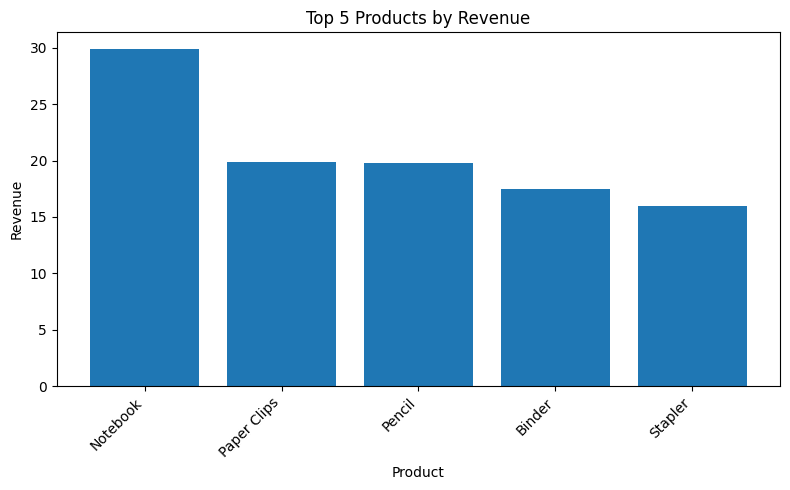

In [38]:
# Plot: revenue by product (top 5)
by_product = pd.read_sql_query("""
    SELECT product, SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
    ORDER BY revenue DESC;
""", conn)

top5 = by_product.head(5)
plt.figure(figsize=(8,5))
plt.bar(top5["product"], top5["revenue"])
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("sales_chart.png")
print("\nSaved bar chart -> sales_chart.png")
